In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mimage
import random
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [3]:
pizza_path_list = os.listdir("pizza_not_pizza/pizza")
not_pizza_path_list = os.listdir("pizza_not_pizza/not_pizza")

In [4]:
print("No of pizza images: ", len(pizza_path_list))
print("No of non-pizza images: ", len(not_pizza_path_list))

No of pizza images:  983
No of non-pizza images:  983


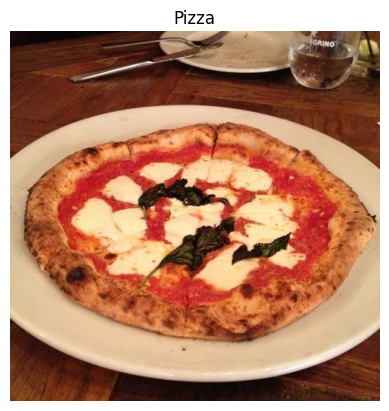

In [5]:
random_index = random.randint(0, 983)
if random.randint(0, 2) == 0:
    image_path = os.path.join("pizza_not_pizza/pizza/", pizza_path_list[random_index])
    label = "Pizza"
else:
    image_path = os.path.join("pizza_not_pizza/not_pizza/", not_pizza_path_list[random_index])
    label = "Not Pizza"
image = mimage.imread(image_path)
plt.imshow(image)
plt.title(label)
plt.axis(False)
plt.show()

In [6]:
train_data = image_dataset_from_directory(
    "pizza_not_pizza",
    labels="inferred",
    label_mode="binary",
    class_names=["not_pizza", "pizza"],
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.2,
    subset="training",
    seed=39
)

valid_data = image_dataset_from_directory(
    "pizza_not_pizza",
    labels="inferred",
    label_mode="binary",
    class_names=["not_pizza", "pizza"],
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.2,
    shuffle=False,
    subset="validation",
    seed=39
)

Found 1966 files belonging to 2 classes.
Using 1573 files for training.
Found 1966 files belonging to 2 classes.
Using 393 files for validation.


### CNN model 

In [7]:
cnn_model = Sequential([
    Conv2D(64, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(32, (3, 3), activation="relu"),
    MaxPool2D(),
    Conv2D(16, (3, 3), activation="relu"),
    MaxPool2D(),
    Flatten(),
    #Dropout(0.25),    
    Dense(512, activation="relu"),
    #Dropout(0.5),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     5,538,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,579,633 (21.28 MB)

 Trainable params: 5,579,633 (21.28 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
cnn_model.compile(
    optimizer="adam", 
    loss="binary_crossentropy",
    metrics=['accuracy']
)

In [10]:
cnn_model = cnn_model.fit(
    train_data,
    epochs=50,
    verbose=1,
    validation_data=valid_data
).history

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.5365 - loss: 7.8180 - val_accuracy: 0.8677 - val_loss: 0.6397
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.6305 - loss: 0.6374 - val_accuracy: 0.8397 - val_loss: 0.5121
Epoch 3/50
29/50 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.7220 - loss: 0.5520

In [10]:
def rescale(X, y):
    return (X/255.0, y)

train_data = train_data.map(rescale)
valid_data = valid_data.map(rescale)

In [11]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                            patience=5)

### CNN

In [12]:
cnn_model_modified = Sequential([
    Conv2D(64, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(32, (3, 3), activation="relu"),
    MaxPool2D(),
    Conv2D(16, (3, 3), activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dropout(0.2),    
    Dense(512, activation="relu"),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [13]:
cnn_model_modified.compile(
    optimizer="adam", 
    loss="binary_crossentropy",
    metrics=['accuracy'])

In [14]:
cnn_model_modified_htr = cnn_model_modified.fit(
    train_data,
    epochs=100,
    verbose=1,
    validation_data=valid_data,
    callbacks=[early_stopping]
).history

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.5317 - loss: 1.0272 - val_accuracy: 0.0000e+00 - val_loss: 0.6952
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.4934 - loss: 0.6932 - val_accuracy: 0.0000e+00 - val_loss: 0.6943
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.5131 - loss: 0.6931 - val_accuracy: 0.0000e+00 - val_loss: 0.6942
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.5113 - loss: 0.6931 - val_accuracy: 0.0000e+00 - val_loss: 0.6948
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.5081 - loss: 0.6931 - val_accuracy: 0.0000e+00 - val_loss: 0.6960
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.4969 - loss: 0.6932 - val_accuracy: 0.0000e+00 - val_loss: 0.6961
